# **Introduction 🌟**


<br>

Diabetes is a chronic condition that affects millions of people worldwide. It occurs commonly when you age, build excessive amount of body mass, family history, or even some risk factors. The objective of this project is to develop a predictive model that can be used in health centers, clinics, and hospitals to correctly evaluate each patient whether he or she is diabetic, or non-diabetic based on the patient record that consists of multiple features including **`age`**, **`gender`**, **`body mass index (BMI)`**, **`hypertension`**, **`heart disease`**, **`smoking history`**, **`HbA1c level`**, and **`blood glucose level`**.

The predictive model will be created via the power of machine learning to accurately categorize each patient based on his or her medical record.

<br>

![Image source](https://d35oenyzp35321.cloudfront.net/causes_of_diabetes_f4c27b90d7.png)
[Image source](https://medeor.ae/surprising-facts-about-diabetes/) © MAX Healthcare. All rights reserved.

## 1. Metadata

The metadata will help as understand the available features in the dataset:

1. **`Age`**: Age refers to the length of time that a patient have lived.
2. **`Gender`**: The patient gender.
3. **`Body Mass Index (BMI)`**: Calculated using height and weight. Higher BMI can increase the risk of developing diabetes.
4. **`Hypertension`**: A medical condition that consist of high blood pressure, 0 for absence and 1 for presence.
5. **`Heart Disease`**: A medical condition that is associated with an increase risk of developing diabetes, 0 for absence and 1 for presence.
6. **`Smoking History`**: Patient smoking status.
7. **`HbA1c Level`**: HbA1c (Hemoglobin A1c) level is a measure of a person’s average blood sugar level over the past 2-3 months. Higher HbA1c can increase the risk of developing diabetes.
8. **`Blood Glucose Level`**: Glucose level in the patient blood stream.
9. **`Diabetes`**: A chronic condition where the body struggles to regulate blood sugar, 0 for absence and 1 for presence.


<br>

## 2. Rules

I will be setting some rules to make sure the workflow is efficient and consistent:

- Duplicated values are allowed (since it is possible for the multiple patients to have the same medical record).

- Exclude outliers from our analysis.

- Any missing value (if found) must be imputed.

- If I found unnecessary category for our analysis under any feature, then am allow to manipulate it.

- I are allowed to use verified websites and studies published for information.
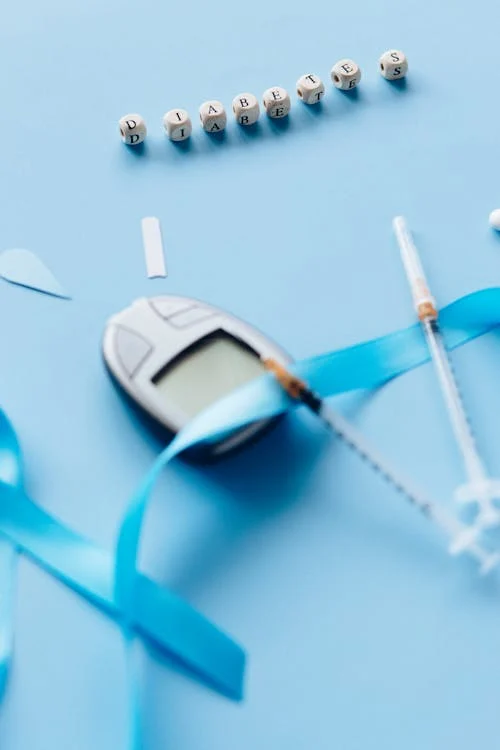
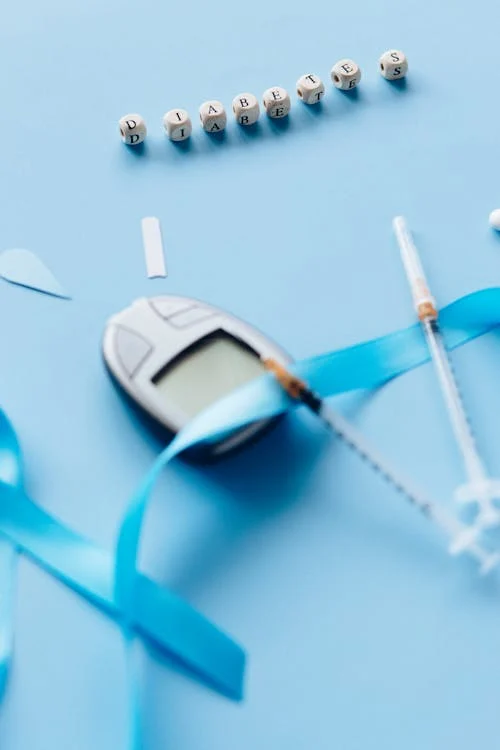

# **Necessary importation 📦**

In [1]:
#Please note that this library makes matplot not show plots...

#If you are interested in the plots, dont run this cell and comment its importation
#of it in the cell below.

#install Autoviz library
!pip -q install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 58.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.


In [2]:
#remove warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#data manipulation libraries
import pandas as pd
import numpy as np

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#data cleaning suggestions 
from autoviz import data_cleaning_suggestions

#transformation classes
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#data splitting
from sklearn.model_selection import train_test_split, KFold

#neural networks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner as kt

#model evaluation tools
from sklearn.metrics import confusion_matrix, classification_report

#balancing techniques
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


Additionally, I will be parallizing the computation for faster results.

At this time, my CPU is i7-6600U. This CPU has 4 threads and 2 cores, [Source](https://www.shidirect.com/product/30731472/Intel-Core-i7-6600U-2.6-GHz).

<div style="padding: 110px; color: white; margin: 10; font-size: 90%; text-align: center; display: fill; border-radius: 10px; overflow: hidden; background-image: url(https://images.pexels.com/photos/6941884/pexels-photo-6941884.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1); background-size: cover; background-position: center 400px;">
</div>

# **Exploratory Data Analysis 📊**

<br>

In the EDA stage, we will be just exploring our data by visualizing it to gather insights to take action in the next stage.

## **1. Reading the CSV file**

In [3]:
#reading the dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

#overview of the dataset
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


Comment: Our target feature will be diabetes. Because our analytics want to predict the diabetic status of a patient.

## **2. Is the target feature balanced or imbalanced?**

In [4]:
diabetes_counts = df['diabetes'].value_counts()
diabetes_counts = diabetes_counts.rename(index={1: 'diabetic', 0: 'non-diabetic'})

#bar chart plot
diabetes_counts.plot(kind='bar', color=['#2be331', '#e3412b'])

plt.title('Diabetic Status Distribution')
plt.ylabel('Count')

plt.xticks(rotation=0)  #keep labels horizontal
plt.show()

In [5]:
diabetes_counts = df['diabetes'].value_counts()
diabetes_counts = diabetes_counts.rename(index={1: 'diabetic', 0: 'non-diabetic'})

diabetes_counts

diabetes
non-diabetic    91500
diabetic         8500
Name: count, dtype: int64

Comment: The target feature is imbalanced.

## **3. What is the dataframe shape?**

In [6]:
#What is the number of records and features we got?
print(f'Number of records: {df.shape[0]}')
print(f'Number of features: {df.shape[1]}')

Number of records: 100000
Number of features: 9


Comment: Exactly 100,000 records and 9 features. Enormous amount of data, alot of information to extract!

## **4. What is the basic information of the data?**

In [7]:
#.info() will give us alot of important details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Comment: We can see that we have 2 categorical data types, and the rest are numerical. Additionally, there are no missing value.

**`smoking_history`** and **`gender`** are the only categorical data type, we have to encode them.

## **5. Statistical measures**

In [8]:
df.describe().T

#.T will Transpose the table!

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Comment: Note that .describe() only calculates the statistical measures for the numerical features.

What really cought my attention is that **`age`** has a minimum value of 0.08 suggesting that we have infants in the dataframe. According to this [website](https://www.nationwidechildrens.org/conditions/neonatal-diabetes#:~:text=But%20type%201%20diabetes%20usually,some%20areas%20of%20the%20world.), the minimum age for diabetes to accure is 6 months, which is in terms of our data 0.50. As a result, any child under 6 months will be excluded from our analysis.

Out of curiosity, how many records we have of infants smaller than 6 months?

In [9]:
#.query() is a filter method
f_df = df.query('age < 0.5')

f_df.shape

(420, 9)

Comment: 420 records for infants less than 6 months.

They will be excluded from our analysis.

## **6. Duplicated values**

In [10]:
print('number of duplicated records:', df.duplicated().sum())

number of duplicated records: 3854


Comment: Assuming each record represents a unique case, then those records are "technically" not considered as duplicates. Hense, I am not going to remove duplicates.

## **7. What are the unique values in each feature?**

In [11]:
counter = 1

for feature in df.columns:
    print(f'The unique values for the feature {feature} are:')
    print(f'{df[feature].unique()} total is {len(df[feature].unique())}')
    
    if (counter < df.shape[1]):
        print('\n---------------------\n') #space
        
    counter += 1

The unique values for the feature gender are:
['Female' 'Male' 'Other'] total is 3

---------------------

The unique values for the feature age are:
[80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48] total is 102

---------------------

The unique values for the feature hypertension are:
[0 1] total is 2

---------------------

The unique values for the feature heart_disease are:
[1 0] total is 2

---------------------

The unique val

Comment: **`smoking_history`** feature has alot of over lapping values. **`gender`** has 3 values.

In [12]:
gender_counts = df['gender'].value_counts()

#bar chart plot
gender_counts.plot(kind='bar', color=['lightpink', 'lightblue', '#9370DB'])

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.xticks(rotation=0)  #keep labels horizontal
plt.show()

In [13]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Comment: The "Other" class is very low, making it irrelavent for our analysis.

In [14]:
smoking_counts = df['smoking_history'].value_counts()

#bar chart plot
smoking_counts.plot(kind='bar')

plt.title('Smoking History Distribution')
plt.xlabel('Smoking category')
plt.ylabel('Count')

plt.xticks(rotation=0)  #keep labels horizontal
plt.show()

In [15]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Comment: We can combine alot of those features together...

## **8. Can we perform feature engineering?**

After viewing the dataset, we saw an opportunity to generate a feature called **`bmi_categories`**. The idea of this feature is to give each range of values in the BMI feature a category that matches the range, such as "Underweight, Normal weight, Obese, ...".

Unfortunately, this idea is not ideal since it introduces bias and inconsistency according to the following study ([the study](https://abstracts.cochrane.org/2013-quebec-city/categorising-continuous-risk-factors-issues-and-implications)).

## **9. What is the correlation with the features? What is the correlation with the target?**

In [16]:
#coping the original dataframe to not affect it
n_df = df.copy()

#correlation cannot be computed for categorical features so we drop them
n_df = n_df.drop(columns=['smoking_history', 'gender'])

#getting the correlation matrix
correlation_matrix = n_df.corr()

#making the matrix visually presentable
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [17]:
#finding the correlation with `diabetes`
target_corr = correlation_matrix['diabetes']

#sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#its important to mention that target_corr_sorted is a Series, not dataframe.
#because it has the correlation values with a sigle feature, diabetes.
#sns library expect a dataframe not a Series. .to_frame() will make it as a Dataframe

#visualization
sns.heatmap(target_corr_sorted.to_frame(), cmap="magma", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

We can visualize that all the features have some sort of correlation with the target. This indicates that the features have some sort of relation with the target regardless of whether the relation is strong/weak.

Most important feature for this analysis will be **`blood_glucose_level`** and **`HbA1c_level`**, as they have the highest correlation with the target feature.

## **10. Are there any outliers?**

Outliers can be detected for only numerical data. Additionally, there are two ways to spot outliers, either mathematically or visually.

- Mathematically will give us the approximate number of outliers for a specific feature.

- Visually will show whether outliers exist or not but does not show the number of them.

In [18]:
def outlier_one_feature(df, x, thresh_val=1.5):
    """
    This function is created to minimize code. We will spot outliers via math and visualization.
    
    df: The dataframe.
    x: The feature.
    thresh_val: Multiplied thresh hold value (default is 1.5).
    """
    
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)

    iqr = q3 - q1

    maximumPond = q3 + (thresh_val * iqr)
    minimumPond = q1 - (thresh_val * iqr)

    #approximate the number of outliers
    f_df1 = df.query(f'{x} >= @maximumPond')
    f_df2 = df.query(f'{x} <= @minimumPond')

    m_df = pd.concat([f_df1, f_df2], ignore_index=True)

    #visualize the feature in a boxplot
    sns.boxplot(data=df, x=x, whis=thresh_val)
    plt.title(f'Boxplot for {x}')
    plt.show()

    print(f'The approximate number of outliers for {x} is {m_df.shape[0]}')

Testing the function:

In [19]:
outlier_one_feature(df, x='age')

The approximate number of outliers for age is 0


In [20]:
outlier_one_feature(df, x='bmi')

The approximate number of outliers for bmi is 7086


In [21]:
outlier_one_feature(df, x='HbA1c_level')

The approximate number of outliers for HbA1c_level is 1315


In [22]:
outlier_one_feature(df, x='blood_glucose_level')

The approximate number of outliers for blood_glucose_level is 2038


## **11. What is the distribution of the features above? Does it affect the outlier detection?**

In [23]:
plt.hist(df['bmi'], bins=40, color='blue', edgecolor='black')
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [24]:
plt.hist(df['HbA1c_level'], bins=40, color='blue', edgecolor='black')
plt.title('HbA1c_level Histogram')
plt.xlabel('HbA1c_level')
plt.ylabel('Count')
plt.show()

In [25]:
plt.hist(df['blood_glucose_level'], bins=40, color='blue', edgecolor='black')
plt.title('blood_glucose_level Histogram')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count')
plt.show()

Comment: **`bmi`**, **`HbA1c_level`**, and **`blood_glucose_level`** have alot of outliers. Other features does not necessarly have outliers since there values are just 0 and 1.

It is crucial to state that I am going to implement the IQR method to remove the outliers. This method works flawlessly with uniform distribution (e.g. `blood_glucose_level` and `HbA1c_level`). However, for skewed data (e.g. `bmi`) this method is not effecint as we have to modify and find the best thresh hold value.

There are many possible solutions including:
- Changing the standard thresh hold value for the IQR method (the standard value is 1.5).
- Transform the feature to make it uniform/normally distributed.
- Use another outlier detector method such as z-score (the z-score method has a standard thresh hold value of 3).

## **12. Data cleaning suggestions from Autoviz library**

In [26]:
suggestions = data_cleaning_suggestions(df)

There are 3854 duplicate rows in your dataset
    Alert: Dropping duplicate rows can sometimes cause your column data types to change to object!
    All variables classified into correct types.


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,object,0.000000,0,,,1 rare categories: ['Other']. Group them into a single category or drop the categories.
age,float64,0.000000,NA,0.080000,80.000000,No issue
hypertension,int64,0.000000,0,0.000000,1.000000,No issue
heart_disease,int64,0.000000,0,0.000000,1.000000,No issue
smoking_history,object,0.000000,0,,,No issue
bmi,float64,0.000000,NA,10.010000,95.690000,Column has 5354 outliers greater than upper bound (39.55) or lower than lower bound(13.71). Cap them or remove them.
HbA1c_level,float64,0.000000,NA,3.500000,9.000000,Column has 1312 outliers greater than upper bound (8.30) or lower than lower bound(2.70). Cap them or remove them.
blood_glucose_level,int64,0.000000,0,80.000000,300.000000,Column has 2031 outliers greater than upper bound (247.50) or lower than lower bound(11.50). Cap them or remove them.
diabetes,int64,0.000000,0,0.000000,1.000000,No issue


Comment: It is amazing to see that this library just covered almost all the problems I detected.

The thing that cought my eyes is the outliers section. Me and the birary both agree on that `bmi`, `HbA1c_level`, and `blood_glucose_level` however, the number of outliers was for `bmi` was different. I think the library is more accurate since I did not consider the skew-ness of the feature. It is also good to mention that the library have gave us the boundries to filter based on. So no need to calculate the IQR or even the z-score.

Hense, an action is needed to remove the outliers for the best model performance.

<div style="padding: 110px; color: white; margin: 10; font-size: 90%; text-align: center; display: fill; border-radius: 10px; overflow: hidden; background-image: url(https://images.pexels.com/photos/17043387/pexels-photo-17043387/free-photo-of-a-person-is-using-a-digital-blood-sugar-meter.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1); background-size: cover; background-position: center 500px;"> 
</div>

# **Preprocessing 🛠️**

<br>

In the preprocessing stage, we are going to take action on the insights found in the EDA stage.

## **1. Remove patients under 6 months**

In [27]:
print('The old shape is:', df.shape)

#dropping the records that has `age` less than 6 months. AKA 0.5.
df = df.query('age > 0.5')

print('The new shape is:', df.shape)

The old shape is: (100000, 9)
The new shape is: (99580, 9)


## **2. Remove most irrelevnt value under the `gender` feature**

In [28]:
print('The old shape is:', df.shape)

#dropping the records in gender that has the string "Other"
df = df.query('gender != "Other"')

print('The new shape is:', df.shape)

The old shape is: (99580, 9)
The new shape is: (99562, 9)


## **3. Changing the content of `smoking_history` feature:**

In [29]:
#printing the unique values under the `smoking_history` feature
print(df['smoking_history'].unique())

#we can merge some of these values...

['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [30]:
#there are many ways to do such task. However, we need to choose the best method
#to make it computationally friendly for our machine

#creating a function that filter the values
def categorize_smoking(smoking_status):
  """
  smoking_status: The value stored inside smoking_history.
  """

  #conditions
  if smoking_status in ['No Info', 'never']:
    return 'non-smoker'
  if smoking_status in ['current']:
    return 'current-smoker'
  if smoking_status in ['ever', 'not current', 'former']:
    return 'past-smoker'

In [31]:
#apply the function to the `smoking_history` feature

#.apply() is a method that taks inside it a function. it is faster than using simple
#conditional statments. we can think of it like an aggregation function like min, max, etc.
df['smoking_history'] = df['smoking_history'].apply(categorize_smoking)

#printing the unique values under the `smoking_history` feature after the changes
print(df['smoking_history'].unique())

['non-smoker' 'current-smoker' 'past-smoker']


## **4. Dealing with outliers**

In [32]:
#from the "Data cleaning suggestions ..." in the EDA section, the library
#have suggested some boundries, it is as following:
#bmi: maximum - 39.55, minimum - 13.71
#HbA1c_level: maximum - 8.3, minimum - 2.7
#blood_glucose_level: maximum - 247.5, minimum - 11.5

#create a function to minimize code repetition:
def remove_outliers(df, feature, maximum, minimum):
    print("The dataframe shape before filter:", df.shape)

    f_df = df.query(f'{feature} >= {minimum} and {feature} <= {maximum}')
    
    print("The dataframe shape after filter:", f_df.shape)

    return f_df

#call the function 3 times (since we have 3 features)
filtered_df = remove_outliers(df, 'bmi', 39.55, 13.71)
filtered_df = remove_outliers(filtered_df, 'HbA1c_level', 8.3, 2.7)
filtered_df = remove_outliers(filtered_df, 'blood_glucose_level', 247.5, 11.5)

The dataframe shape before filter: (99562, 9)
The dataframe shape after filter: (94292, 9)
The dataframe shape before filter: (94292, 9)
The dataframe shape after filter: (93144, 9)
The dataframe shape before filter: (93144, 9)
The dataframe shape after filter: (91685, 9)


In [33]:
print("The dataframe shape after filtering:", filtered_df.shape)

filtered_df.head(10)

The dataframe shape after filtering: (91685, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current-smoker,23.45,5.0,155,0
4,Male,76.0,1,1,current-smoker,20.14,4.8,155,0
5,Female,20.0,0,0,non-smoker,27.32,6.6,85,0
6,Female,44.0,0,0,non-smoker,19.31,6.5,200,1
7,Female,79.0,0,0,non-smoker,23.86,5.7,85,0
8,Male,42.0,0,0,non-smoker,33.64,4.8,145,0
9,Female,32.0,0,0,non-smoker,27.32,5.0,100,0


## **5. Splitting the data into x and y**

Splitting the data is necessary to proceed with the next steps.

In [34]:
#x refers to the independent features
#y refers to the dependent feature (the target)
x = filtered_df.drop(columns=['diabetes'])
y = filtered_df['diabetes']

In [35]:
y.value_counts()

diabetes
0    87059
1     4626
Name: count, dtype: int64

We are left with only 4626 cases of diabetes. seems like most of the outliers were diabetic cases.

## **6. Transformation and encoding**

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        #scale continuous features
        ('scale', StandardScaler(), ['age', 'blood_glucose_level', 'bmi', 'HbA1c_level']),
        #one-hot encoding for categorical features
        ('onehot', OneHotEncoder(), ['gender', 'smoking_history']),
    ],

    #leave the unmentioned columns unmodified
    remainder='passthrough'
)

x = preprocessor.fit_transform(x)

## **7. Balancing the target feature**

It is crucial to mention that I have to split the data here into training and testing sets. This is important to ensure that the testing set is based on real world data to give real results.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    stratify=y,   
                                                    random_state=7)

#stratify: ensure that test and train have the same split rashio

In [38]:
#Resampling techiniques

#0.1: 10% x majority class - is the new number of minority class
over_sampler = SMOTE(sampling_strategy=0.1)

#1: ensures that the majority class matches the minority class
under_sampler = RandomUnderSampler(sampling_strategy=1)

In [39]:
#create a pipeline that resamples the data
resampler_pipeline = Pipeline(
    steps=[
        ('over', over_sampler),
        ('under', under_sampler),
    ]
)

In [40]:
x_resamp, y_resamp = resampler_pipeline.fit_resample(x_train, y_train)

In [41]:
print("y_train old shape:", y_train.shape, '\n')

print("y_train class distribution:\n", y_train.value_counts())

y_train old shape: (73348,) 

y_train class distribution:
 diabetes
0    69647
1     3701
Name: count, dtype: int64


In [42]:
print("y_train new shape:", y_resamp.shape, '\n')

print("y_train class distribution:\n", y_resamp.value_counts())

y_train new shape: (13928,) 

y_train class distribution:
 diabetes
0    6964
1    6964
Name: count, dtype: int64


Additionally, we need to create validation set. It will be integrated from the testing set since we want it to be based on real world data.

In [43]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,
                                                test_size=0.8,
                                                stratify=y_test,
                                                random_state=42)

<div style="padding: 110px; color: white; margin: 10; font-size: 90%; text-align: center; display: fill; border-radius: 10px; overflow: hidden; background-image: url(https://images.pexels.com/photos/9574325/pexels-photo-9574325.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1); background-size: cover; background-position: center 450px;">
</div>

# **Modeling ⚙️**

<br>

In this stage we are going to use Artificial Neural Network.

Why?
- Has the ability to take Linear and Non-linear Relationships.
- High Performance in Large Datasets.

Since neural networks has alot of tunable parameters, I want to refer to previous works to start were someone stopped.

The following [notebook](https://www.kaggle.com/code/micaeld/diabetes-predict-tutorial-tensorflow) creator have use neural network, getting 0.9722 on validation data and 0.9709 on testing data. making him a good starting point for my model building.

What he used:
- 2 hidden layers, each having 32 units.
- ReLU activation function for hidden layers.
- 2 dropout layers.
- Adam Optimizer.
- Batch_size of 16.

What I did not like about his work:
- He only evaluated the model with accuracy and loss.
- He did not balance the dataset, making his evaluation not really accurate.

Having note that, I am going to fix only the Optimizer, and the activation function RelU. Then I will use KerasTuner to hopefully, find the best parameters for me.

## **1. Building the model structure**

In [44]:
def build_model(hp):
    """
    This function will find the best HyperParameters for this Artificial Neural Network.
    """

    #I used Sequential API
    model = Sequential()

    #input layer
    model.add(Input(shape=(x_train.shape[1],)))

    #number of hidden layers is either 1, 2, or 3
    num_hidden_layers = hp.Int('num_hidden_layers', min_value=1, max_value=3, step=1)

    #a storage for the num. of units in the layer created.
    prev_units = None 

    #a for loop to place units inside each hidden layer
    for i in range(num_hidden_layers):
        
        #the possible number of units is 16, 32, 48, and 64.
        #additionally, we will be following a principle in ANN is that the first hidden
        #layers must have equal or more units then the next hidden layer
        max_units = max(prev_units - 16, 16) if prev_units else 64
        min_units = 16

        units = hp.Int(f'num_units_layer_{i+1}', min_value=min_units, max_value=max_units, step=16)

        model.add(Dense(units, activation='relu'))

        use_dropout = hp.Boolean(f'use_dropout_layer_{i+1}')
        if use_dropout:
            dropout_rate = hp.Float(f'dropout_rate_layer_{i+1}', min_value=0.1, max_value=0.4, sampling='linear')
            model.add(Dropout(dropout_rate))

        #update the number of units
        prev_units = units

    #sigmoid is an activation function for binary classification
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate',
                                              min_value=1e-5,
                                              max_value=1e-2,
                                              sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

## **2. Create a class for the hyperparameters**

In [45]:
#This class will be modifying the batch_size number. We cannot modify this hyperparameter
#inside the function above. So the class is necessary

class MyTuner(kt.RandomSearch):
  def run_trial(self, trial, *args, **kwargs):
    kwargs['batch_size'] = trial.hyperparameters.Int('batch_size',
                                                     min_value=8,
                                                     max_value=16,
                                                     step=8)
    return super(MyTuner, self).run_trial(trial, *args, **kwargs)

## **3. Create an object of the class**

In [46]:
tuner = MyTuner(
    build_model,              #the model building function
    objective='val_loss',     #look for lowest validation loss
    max_trials=25,            #maximum number of training
    executions_per_trial=1,   #since my model is not complex, 1 is enough
    directory='tuner_results',#main folder name
    project_name='diabetes',  #subfolder name
    overwrite=True            #overwrite old trials from previous runs       
)

## **4. Training the object**

Before training, we want to define EarlyStopping callback.

In [47]:
#EarlyStopping callback
es_1 = EarlyStopping(
    patience=4,
    monitor='val_loss',
    mode='min',
    restore_best_weights=True
)

In [48]:
tuner.search(x_resamp, y_resamp,
             validation_data=(x_val, y_val),
             epochs=100, callbacks=[es_1], verbose=0)

## **5. Training object summary**

In [49]:
#taking all trials and placing them in a dataframe

all_trials = tuner.oracle.trials.values()

results = []
for trial in all_trials:
    trial_data = trial.hyperparameters.values
    trial_data['score'] = trial.score
    results.append(trial_data)

trials_df = pd.DataFrame(results)

In [50]:
trials_df

,num_hidden_layers,num_units_layer_1,use_dropout_layer_1,learning_rate,batch_size,num_units_layer_2,use_dropout_layer_2,num_units_layer_3,use_dropout_layer_3,score,dropout_rate_layer_1,dropout_rate_layer_2,dropout_rate_layer_3
0,3,64,False,0.000929,8,16,False,16,False,0.230540,NaN,NaN,NaN
1,2,48,True,0.000306,16,32,True,16,True,0.279221,0.100000,0.100000,NaN
2,1,16,True,0.000848,8,32,True,16,True,0.293206,0.114098,0.364810,NaN
3,1,48,False,0.000017,8,16,False,16,True,0.330234,0.271348,0.321355,NaN
4,3,64,True,0.000147,8,48,True,16,True,0.275130,0.333212,0.199004,0.100000
5,2,32,True,0.000713,8,48,False,16,True,0.229813,0.334162,0.192292,0.231382
6,3,64,True,0.000013,8,32,False,16,True,0.348574,0.394768,0.322645,0.393563
7,3,48,True,0.000084,8,16,True,16,True,0.325721,0.244793,0.131394,0.164734
8,1,16,False,0.000015,8,16,True,16,True,0.716965,0.113889,0.169367,0.122113
9,2,32,True,0.000013,8,48,False,16,True,0.339121,0.139879,0.330254,0.332073


The `score` here refers to the validation loss, the smaller the better!

## **6. Getting the best trial model**

In [51]:
#getting the best trial model
model = tuner.get_best_models(num_models=1)[0]

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           1,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,769 (10.82 KB)

 Trainable params: 2,769 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
#the best trial hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

all_hyperparameters = best_hps.values

#print all hyperparameters
for key, value in all_hyperparameters.items():
    print(f"{key}: {value}")

num_hidden_layers: 3
num_units_layer_1: 32
use_dropout_layer_1: False
learning_rate: 0.002187095769452065
batch_size: 8
num_units_layer_2: 48
use_dropout_layer_2: True
num_units_layer_3: 16
use_dropout_layer_3: True
dropout_rate_layer_1: 0.18664761669824337
dropout_rate_layer_2: 0.25685242769611294
dropout_rate_layer_3: 0.27760439738879505
score: 0.2092820554971695


## **7. Re-train the best trial**

I have to create the same model structure using the above information

In [53]:
def best_model():
    model = Sequential()

    model.add(Input(shape=(x_resamp.shape[1], )))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(16, activation='relu'))

    model.add(Dense(16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.0009291189310240945),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [54]:
#EarlyStopping callback (again)
es_2 = EarlyStopping(
    patience=4,
    monitor='val_loss',
    mode='min',
    restore_best_weights=True
)

In [55]:
best_model = best_model()

#histo: is a history variable to store the graphs
histo = best_model.fit(x_resamp, y_resamp, batch_size=8,
                       validation_data=(x_val, y_val),
                       epochs=100, callbacks=[es_2], verbose=1)

Epoch 1/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8368 - loss: 0.3613 - val_accuracy: 0.8383 - val_loss: 0.2946
Epoch 2/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8697 - loss: 0.2791 - val_accuracy: 0.8465 - val_loss: 0.2894
Epoch 3/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8826 - loss: 0.2600 - val_accuracy: 0.8296 - val_loss: 0.3070
Epoch 4/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 0.2579 - val_accuracy: 0.8375 - val_loss: 0.2822
Epoch 5/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8895 - loss: 0.2427 - val_accuracy: 0.8350 - val_loss: 0.2764
Epoch 6/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8825 - loss: 0.2475 - val_accuracy: 0.8377 - val_loss: 0.2901
Epoch 7/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.2406 - val_accuracy: 0.8664 - val_loss: 0.2441
Epoch 8/100
1741/1741 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8924 - loss: 0

In [56]:
#plotting both the training the validation loss using the history object from keras
plt.plot(histo.history['loss'], label='Training Loss', marker='o')
plt.plot(histo.history['val_loss'], label='Validation Loss', marker='o')

#making the graph presentable
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## **8. Model evaluation**

In [57]:
loss, accuracy = best_model.evaluate(x_test, y_test)

print(f'Model accuracy on testing set: {accuracy:.2f}')
print(f'Model loss on testing set: {loss}')

print('\n---------------------------------\n')

y_pred = best_model.predict(x_test)

y_pred_class = y_pred.round()

cm = confusion_matrix(y_test, y_pred_class)

print(cm)

print('\n---------------------------------\n')

print(classification_report(y_test, y_pred_class))

459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8719 - loss: 0.2382
Model accuracy on testing set: 0.88
Model loss on testing set: 0.23133403062820435

---------------------------------

459/459 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[12215  1715]
 [   81   659]]

---------------------------------

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     13930
           1       0.28      0.89      0.42       740

    accuracy                           0.88     14670
   macro avg       0.64      0.88      0.68     14670
weighted avg       0.96      0.88      0.91     14670



The model performed so poorly...

## **9. What if we did not balance the data?**

In this experiment, we are going to use the IMBALANCED data. Note that the following data was encoded,transformed, and the outliers got delt with.

In [58]:
#split into training (70%) and remaining (30%) datasets
x_train, x_rem, y_train, y_rem = train_test_split(x, y, 
                                                  test_size=0.3, 
                                                  stratify=y, 
                                                  random_state=20)

#split temp into validation (50% of remaining = 15% of total) and 
#testing (50% of remaining = 15% of total)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, 
                                                test_size=0.5, 
                                                stratify=y_rem, 
                                                random_state=20)

In [59]:
#EarlyStopping callback (again)
es_3 = EarlyStopping(
    patience=4,
    monitor='val_loss',
    mode='min',
    restore_best_weights=True
)

In [60]:
#define the same model again to avoid saving error. you can ignore this part :)

def best_model():
    model = Sequential()

    model.add(Input(shape=(x_resamp.shape[1], )))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(16, activation='relu'))

    model.add(Dense(16, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.0009291189310240945),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [61]:
best_model_new = best_model()

#histo: is a history variable to store the graphs
histo = best_model_new.fit(x_train, y_train, batch_size=16,
                           validation_data=(x_val, y_val),
                           epochs=100, callbacks=[es_3], verbose=1)

Epoch 1/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9472 - loss: 0.1468 - val_accuracy: 0.9729 - val_loss: 0.0858
Epoch 2/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9712 - loss: 0.0873 - val_accuracy: 0.9711 - val_loss: 0.0861
Epoch 3/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9735 - loss: 0.0823 - val_accuracy: 0.9732 - val_loss: 0.0810
Epoch 4/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9735 - loss: 0.0816 - val_accuracy: 0.9738 - val_loss: 0.0806
Epoch 5/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9733 - loss: 0.0814 - val_accuracy: 0.9738 - val_loss: 0.0814
Epoch 6/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9735 - loss: 0.0800 - val_accuracy: 0.9736 - val_loss: 0.0815
Epoch 7/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9743 - loss: 0.0795 - val_accuracy: 0.9738 - val_loss: 0.0802
Epoch 8/100
4012/4012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9738 - loss: 0

In [62]:
#plotting both the training the validation loss using the history object from keras
plt.plot(histo.history['loss'], label='Training Loss', marker='o')
plt.plot(histo.history['val_loss'], label='Validation Loss', marker='o')

#making the graph presentable
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [63]:
loss, accuracy = best_model_new.evaluate(x_test, y_test)

print(f'Model accuracy on testing set: {accuracy:.2f}')
print(f'Model loss on testing set: {loss}')

print('\n---------------------------------\n')

y_pred = best_model_new.predict(x_test)

y_pred_class = y_pred.round()

cm = confusion_matrix(y_test, y_pred_class)

print(cm)

print('\n---------------------------------\n')

print(classification_report(y_test, y_pred_class))

430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9740 - loss: 0.0792
Model accuracy on testing set: 0.97
Model loss on testing set: 0.0788821130990982

---------------------------------

430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[13058     1]
 [  350   344]]

---------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     13059
           1       1.00      0.50      0.66       694

    accuracy                           0.97     13753
   macro avg       0.99      0.75      0.82     13753
weighted avg       0.98      0.97      0.97     13753



It is worth mentioning that the second model did very better!. This can be because neural network get better performance with alot of data. We can see that the diabetic class did not do very well because the data points are less.

## **10. What if we trained the model on raw data?**

In this experiment, we are going to train a model with raw data. I will just transform the data and encode it.

In [64]:
#reading the dataset
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

#overview of the dataset
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [65]:
#x refers to the independent features
#y refers to the dependent feature (the target)
x = df.drop(columns=['diabetes'])
y = df['diabetes']

In [66]:
preprocessor = ColumnTransformer(
    transformers=[
        #scale continuous features
        ('scale', StandardScaler(), ['age', 'blood_glucose_level', 'bmi', 'HbA1c_level']),
        #one-hot encoding for categorical features
        ('onehot', OneHotEncoder(), ['gender', 'smoking_history']),
    ],

    #leave the unmentioned columns unmodified
    remainder='passthrough'
)

x = preprocessor.fit_transform(x)

In [67]:
#split into training (70%) and remaining (30%) datasets
x_train, x_rem, y_train, y_rem = train_test_split(x, y, 
                                                  test_size=0.3, 
                                                  stratify=y, 
                                                  random_state=20)

#split temp into validation (50% of remaining = 15% of total) and 
#testing (50% of remaining = 15% of total)
x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem, 
                                                test_size=0.5, 
                                                stratify=y_rem, 
                                                random_state=20)

In [68]:
#We used RandomSearch directly here because the data is large.
#Batch_size of 8 or 16 will be very slow, especially since I have no GPU
tuner2 = kt.RandomSearch(
    build_model,              #the model building function
    objective='val_loss',     #look for lowest validation loss
    max_trials=8,             #maximum number of training
    executions_per_trial=1,   #since my model is not complex, 1 is enough
    directory='tuner_results',#main folder name
    project_name='diabetes2', #subfolder name
    overwrite=True            #overwrite old trials from previous runs       
)

In [69]:
#EarlyStopping callback
es_4 = EarlyStopping(
    patience=4,
    monitor='val_loss',
    mode='min',
    restore_best_weights=True
)

In [70]:
#The batch_size will be fixed at 32.
tuner2.search(x_train, y_train, batch_size=32,
              validation_data=(x_val, y_val),
              epochs=100, callbacks=[es_4], verbose=0)

In [71]:
#taking all trials and placing them in a dataframe
all_trials = tuner2.oracle.trials.values()

results = []
for trial in all_trials:
    trial_data = trial.hyperparameters.values
    trial_data['score'] = trial.score
    results.append(trial_data)

trials_df2 = pd.DataFrame(results)

In [72]:
trials_df2

,num_hidden_layers,num_units_layer_1,use_dropout_layer_1,learning_rate,dropout_rate_layer_1,num_units_layer_2,use_dropout_layer_2,num_units_layer_3,use_dropout_layer_3,score,dropout_rate_layer_2,dropout_rate_layer_3
0,3,64,True,0.000657,0.100000,16,False,16,False,0.081881,NaN,NaN
1,3,16,True,0.000496,0.399446,32,True,16,False,0.099861,0.100000,NaN
2,3,64,True,0.000387,0.238424,48,False,16,False,0.081975,0.375285,NaN
3,2,32,True,0.000421,0.103531,32,False,16,True,0.081723,0.200858,NaN
4,1,64,False,0.000010,0.151878,32,True,16,False,0.107567,0.242447,NaN
5,2,48,False,0.009712,0.348858,16,False,16,True,0.081188,0.213385,NaN
6,3,32,True,0.000029,0.370975,32,True,16,True,0.085941,0.240444,0.100000
7,2,64,True,0.000975,0.339085,16,False,16,True,0.081802,0.360206,0.343861


In [73]:
#getting the best trial model
model = tuner2.get_best_models(num_models=1)[0]

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
#the best trial hyperparameters
best_hps = tuner2.get_best_hyperparameters(num_trials=1)[0]

all_hyperparameters = best_hps.values

#print all hyperparameters
for key, value in all_hyperparameters.items():
    print(f"{key}: {value}")

num_hidden_layers: 2
num_units_layer_1: 48
use_dropout_layer_1: False
learning_rate: 0.009712362827199107
dropout_rate_layer_1: 0.3488579916824967
num_units_layer_2: 16
use_dropout_layer_2: False
num_units_layer_3: 16
use_dropout_layer_3: True
dropout_rate_layer_2: 0.21338542609853717
score: 0.08118762820959091


In [75]:
def raw_data_model():
    model = Sequential()

    model.add(Input(shape=(x_train.shape[1],)))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.33908455607909993))

    model.add(Dense(16, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=0.0009745998635814003),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [76]:
#EarlyStopping callback
es_5 = EarlyStopping(
    patience=4,
    monitor='val_loss',
    mode='min',
    restore_best_weights=True
)

In [77]:
last_model = raw_data_model()

#histo: is a history variable to store the graphs
histo = last_model.fit(x_train, y_train, batch_size=32,
                           validation_data=(x_val, y_val),
                           epochs=100, callbacks=[es_5], verbose=1)

Epoch 1/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9349 - loss: 0.1860 - val_accuracy: 0.9641 - val_loss: 0.1055
Epoch 2/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9635 - loss: 0.1046 - val_accuracy: 0.9690 - val_loss: 0.0954
Epoch 3/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9680 - loss: 0.0949 - val_accuracy: 0.9712 - val_loss: 0.0872
Epoch 4/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9693 - loss: 0.0887 - val_accuracy: 0.9715 - val_loss: 0.0853
Epoch 5/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9701 - loss: 0.0867 - val_accuracy: 0.9723 - val_loss: 0.0841
Epoch 6/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.0865 - val_accuracy: 0.9721 - val_loss: 0.0838
Epoch 7/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9712 - loss: 0.0844 - val_accuracy: 0.9723 - val_loss: 0.0830
Epoch 8/100
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9716 - loss: 0

In [78]:
#plotting both the training the validation loss using the history object from keras
plt.plot(histo.history['loss'], label='Training Loss', marker='o')
plt.plot(histo.history['val_loss'], label='Validation Loss', marker='o')

#making the graph presentable
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [79]:
loss, accuracy = last_model.evaluate(x_test, y_test)

print(f'Model accuracy on testing set: {accuracy:.2f}')
print(f'Model loss on testing set: {loss}')

print('\n---------------------------------\n')

y_pred = last_model.predict(x_test)

y_pred_class = y_pred.round()

cm = confusion_matrix(y_test, y_pred_class)

print(cm)

print('\n---------------------------------\n')

print(classification_report(y_test, y_pred_class))

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9724 - loss: 0.0819
Model accuracy on testing set: 0.97
Model loss on testing set: 0.08366596698760986

---------------------------------

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[13725     0]
 [  438   837]]

---------------------------------

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13725
           1       1.00      0.66      0.79      1275

    accuracy                           0.97     15000
   macro avg       0.98      0.83      0.89     15000
weighted avg       0.97      0.97      0.97     15000



It is amazing to see that the more data got introduced, the better the model became!

<div style="padding: 110px; color: white; margin: 10; font-size: 90%; text-align: center; display: fill; border-radius: 10px; overflow: hidden; background-image: url(https://images.pexels.com/photos/7653093/pexels-photo-7653093.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1); background-size: cover; background-position: center 450px;">
</div>

# **Summary 📝**

<br>

In conclusion, such model cannot be generalized to the public since it still has a large number of errors.

To improve, we suggest the following:
- Data Collection: Even though we had over 100,000 records, the number of outliers was incredibly large, Not to mention that there was a huge imbalance in the target feature. These contributed to minimizing the data we are working with. 
- Model Exploration: While the neural network model performed well with no signs of overfitting/underfitting (training, validation, and testing had almost the same accuracy), such a model required a large amount of data, which we do not have. A model like RandomForest, or XGBoost is worth exploring.
- Applying Cross-Validation Techniques: A possible good cross-validaton could be either KFold or StratifiedKFold depending if the data is balanced or not.

<b>
    
# <span style="color: black; font-weight: bold; font-size: 100px;">THANKS 🙏</span>

</b>

<span style="color: black; font-weight: bold; font-size: 20px;">upvote please 🙏</span>